# kc_housing_analysis

Import libraries that will be used later

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
# Set plot space as inline for inline plots display
%matplotlib inline

## Load data and check data format

In [2]:
housing_df = pd.read_csv('kc_house_data.csv', na_values = '?')

In [3]:
housing_df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,NaN,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [4]:
housing_df.shape

(21597, 21)

In [5]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21143 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(9), int64(11), object(1)
memory usage: 3.5+ MB


In [6]:
column_list = list(housing_df.columns)
unique_value_of_each_column = list(map(lambda x:housing_df[x].unique(), column_list))
unique_value_of_each_column

[array([7129300520, 6414100192, 5631500400, ..., 1523300141,  291310100,
        1523300157]),
 array(['10/13/2014', '12/9/2014', '2/25/2015', '2/18/2015', '5/12/2014',
        '6/27/2014', '1/15/2015', '4/15/2015', '3/12/2015', '4/3/2015',
        '5/27/2014', '5/28/2014', '10/7/2014', '1/24/2015', '7/31/2014',
        '5/29/2014', '12/5/2014', '4/24/2015', '5/14/2014', '8/26/2014',
        '7/3/2014', '5/16/2014', '11/20/2014', '11/3/2014', '6/26/2014',
        '12/1/2014', '6/24/2014', '3/2/2015', '11/10/2014', '12/3/2014',
        '6/13/2014', '12/30/2014', '2/13/2015', '6/20/2014', '7/15/2014',
        '8/11/2014', '7/7/2014', '10/28/2014', '7/29/2014', '7/18/2014',
        '3/25/2015', '7/16/2014', '4/28/2015', '3/11/2015', '9/16/2014',
        '2/17/2015', '12/31/2014', '2/5/2015', '3/3/2015', '8/19/2014',
        '4/7/2015', '8/27/2014', '2/23/2015', '12/10/2014', '8/28/2014',
        '10/21/2014', '12/7/2014', '6/3/2014', '9/9/2014', '10/9/2014',
        '8/25/2014', '6/12/201

## Data cleaning

### checking missing values

In [7]:
housing_df.isna().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement     True
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [8]:
housing_df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     454
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

### Replace missing values with median

In [9]:
list_missing_value_columns = ['waterfront', 'view', 'yr_renovated','sqft_basement']
list_missing_value_columns

for value in list_missing_value_columns:
    median_value = housing_df[value].median()
    housing_df[value].fillna(median_value, inplace=True)
# housing_df['waterfront'].fillna(housing_df['waterfront'].median(), inplace=True)
housing_df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [10]:
# double check if anything is missing
housing_df.isna().any().any()

False

### Drop useless column

There seems quite a few duplicated id number with different information so for better understanding we will drop them

In [11]:
housing_df.drop(columns='id', inplace=True)

In [12]:
housing_df.head(50)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,0.0,1995,0.0,98003,47.3097,-122.327,2238,6819
7,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,0.0,3,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,3,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,3,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


For now data cleaning is being done, for categorical variables we will create dummy variables in later.

### Question 1: As a property adviser, how does internal property factors affect housing price? What are the factors that can mostly predict the housing price and how can you use it to improve your investigation?

## Data visualization

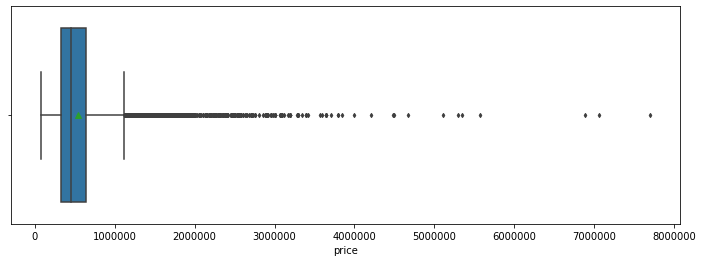

In [13]:
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(x = 'price', 
            data = housing_df, 
            orient = 'h', 
            width = 0.8, 
            fliersize = 3, 
            showmeans=True, 
            ax = ax)
plt.show()

From the figure below we can see most of the housing price ranges in the number between 0-1 millions but there're few outliers above 6 millions but in this case we will keep it.

### Continuous Variables for internal factors

In this report, we will consider sqft_living, sqft_lot, sqft_above, sqft_basement as continuous variables, bathrooms, bedrooms, floors, grade as categorical variables.

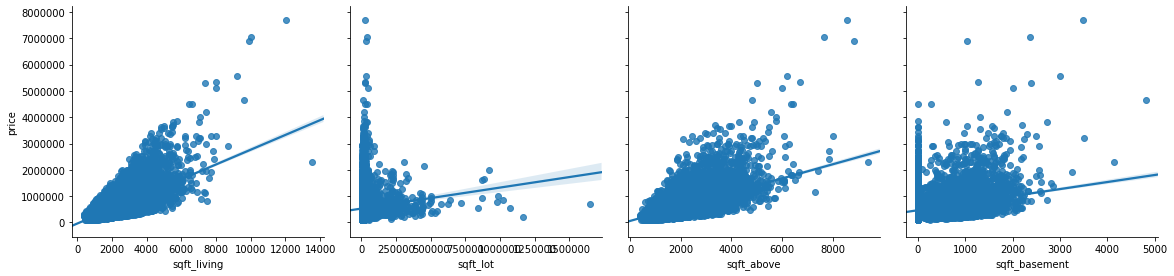

In [14]:
internal_factors = ['sqft_living', 'sqft_lot','sqft_above','sqft_basement']
sns.pairplot(data=housing_df,
                  y_vars=['price'],
                  x_vars=internal_factors,
                  kind = 'reg',
                  height=4)

### Check if it's normally distributed

In [15]:
x_cols = ['sqft_living', 'sqft_lot','sqft_above','sqft_basement','price']

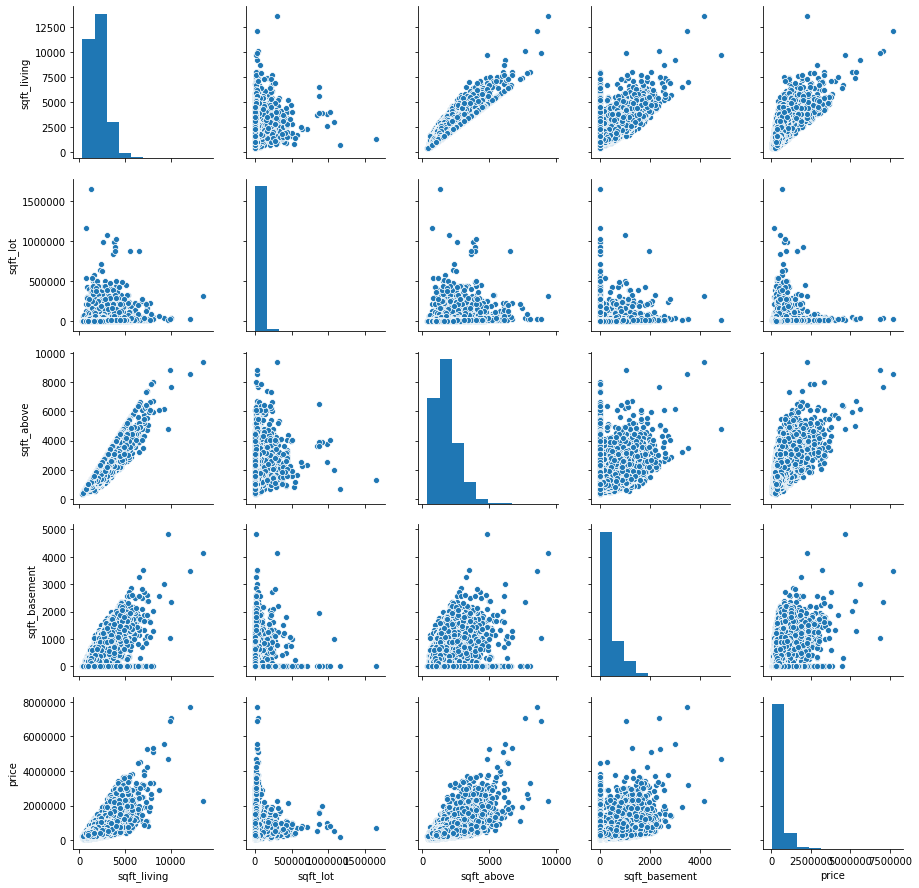

In [16]:
sns.pairplot(housing_df[x_cols])

### Log transformation

In [17]:
non_normal = ['sqft_living', 'sqft_lot', 'sqft_above', 'price']
for variable in non_normal:
    housing_df[variable] = housing_df[variable].map(lambda x: np.log(x))


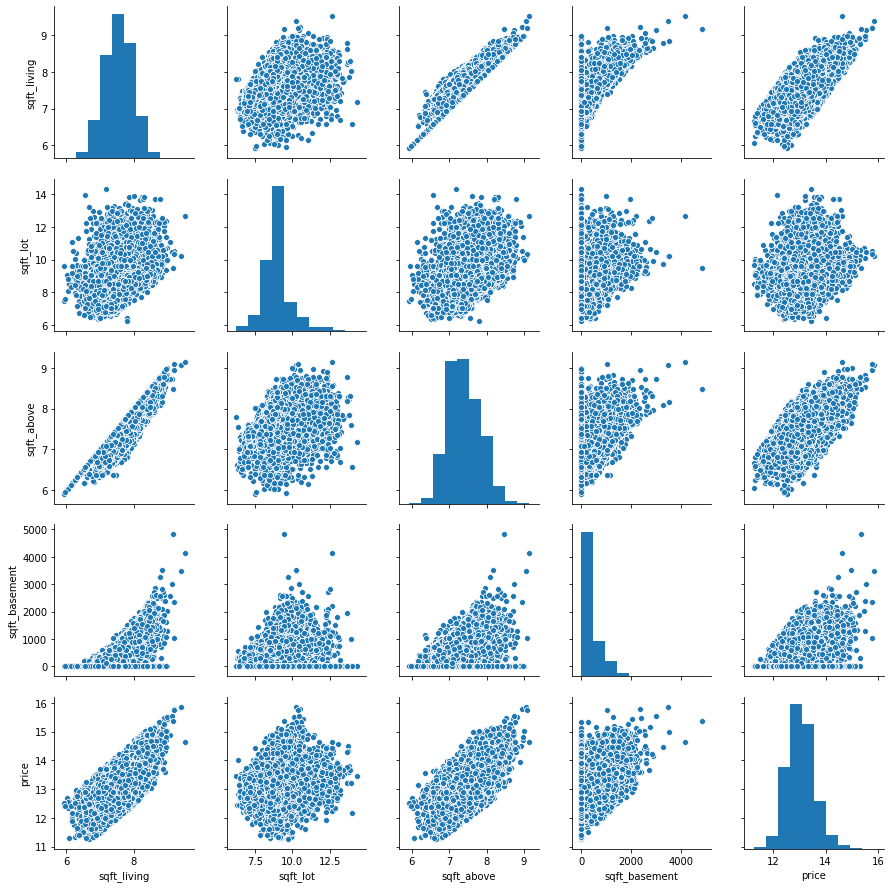

In [18]:
sns.pairplot(housing_df[x_cols])

from the the figures showing above, we can see the sqft_living and sqft_above look like having a stronger impact on the housing price, and we will analyse this when we test for the linear regression model.

## Multicollinearity of Features

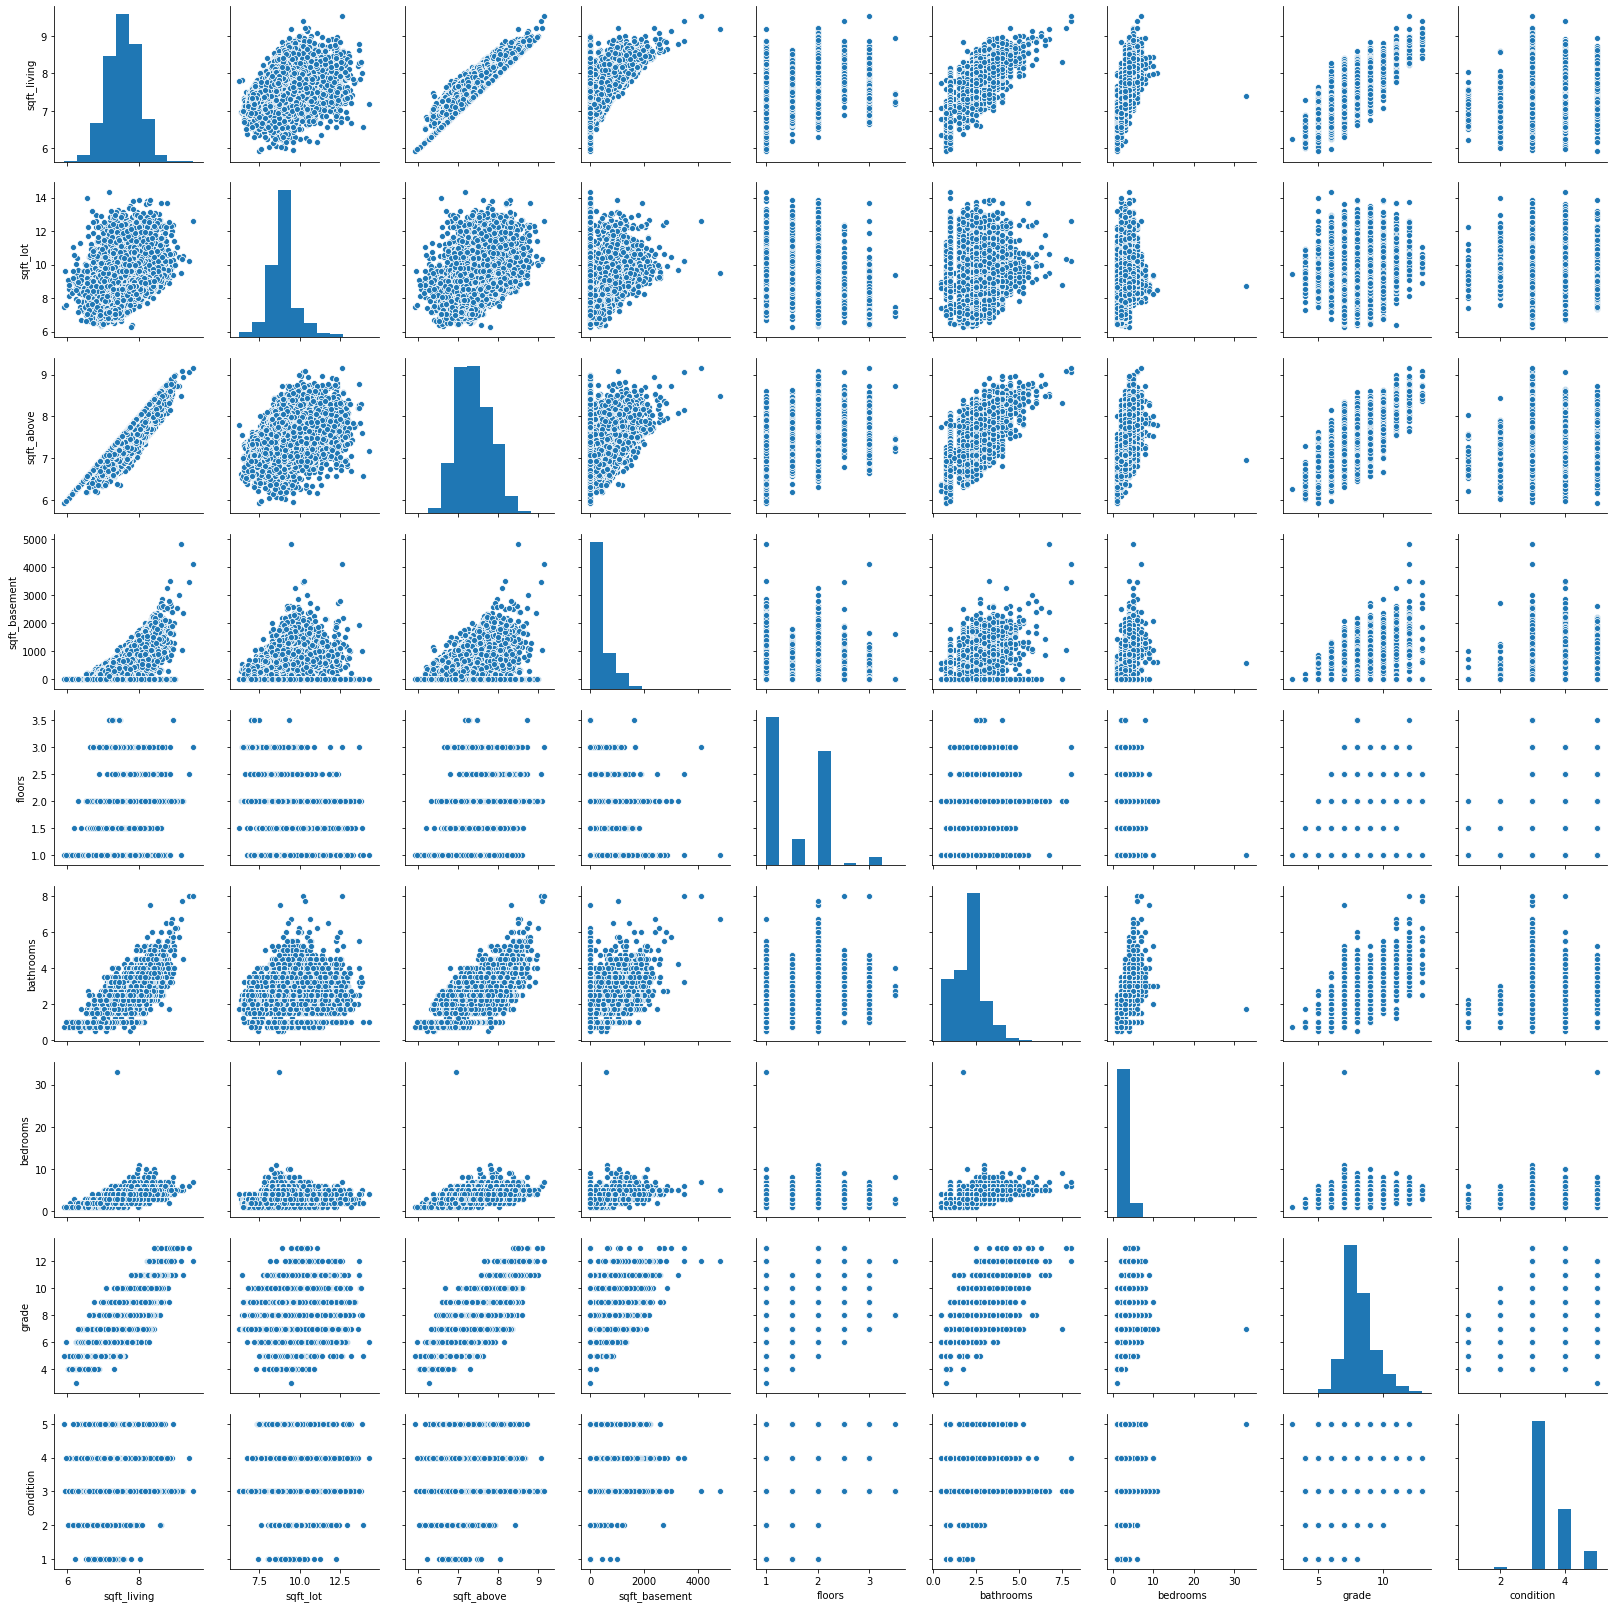

In [19]:
x2_cols=['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'floors', 'bathrooms', 'bedrooms', 'grade', 'condition'
]
sns.pairplot(housing_df[x2_cols])

In [20]:
housing_df[x2_cols].corr()

,sqft_living,sqft_lot,sqft_above,sqft_basement,floors,bathrooms,bedrooms,grade,condition
sqft_living,1.000000,0.325983,0.864979,0.417212,0.367564,0.762135,0.621820,0.743038,-0.049620
sqft_lot,0.325983,1.000000,0.318663,0.092895,-0.237460,0.100624,0.184922,0.184323,0.073694
sqft_above,0.864979,0.318663,1.000000,-0.050290,0.547619,0.695839,0.516072,0.742869,-0.150730
sqft_basement,0.417212,0.092895,-0.050290,1.000000,-0.241866,0.278485,0.297229,0.165843,0.168482
floors,0.367564,-0.237460,0.547619,-0.241866,1.000000,0.502582,0.177944,0.458794,-0.264075
bathrooms,0.762135,0.100624,0.695839,0.278485,0.502582,1.000000,0.514508,0.665838,-0.126479
bedrooms,0.621820,0.184922,0.516072,0.297229,0.177944,0.514508,1.000000,0.356563,0.026496
grade,0.743038,0.184323,0.742869,0.165843,0.458794,0.665838,0.356563,1.000000,-0.146896
condition,-0.049620,0.073694,-0.150730,0.168482,-0.264075,-0.126479,0.026496,-0.146896,1.000000


In [21]:
abs(housing_df[x2_cols].corr()) > 0.75

,sqft_living,sqft_lot,sqft_above,sqft_basement,floors,bathrooms,bedrooms,grade,condition
sqft_living,True,False,True,False,False,True,False,False,False
sqft_lot,False,True,False,False,False,False,False,False,False
sqft_above,True,False,True,False,False,False,False,False,False
sqft_basement,False,False,False,True,False,False,False,False,False
floors,False,False,False,False,True,False,False,False,False
bathrooms,True,False,False,False,False,True,False,False,False
bedrooms,False,False,False,False,False,False,True,False,False
grade,False,False,False,False,False,False,False,True,False
condition,False,False,False,False,False,False,False,False,True


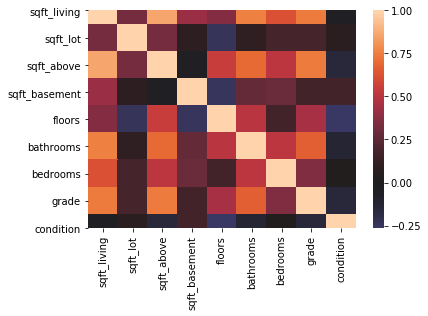

In [22]:
sns.heatmap(housing_df[x2_cols].corr(), center=0);

In [23]:
housing_df = housing_df.drop('sqft_living', axis=1)

### P value check

In [24]:
x3_cols=['sqft_lot', 'sqft_above', 'sqft_basement', 'floors', 'bathrooms', 'bedrooms', 'grade', 'condition']
X = housing_df[x3_cols]
y = housing_df['price']

X = sm.add_constant(X)

model = sm.OLS(y,X).fit()
model.summary()

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     3661.
Date:                Tue, 03 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:03:33   Log-Likelihood:                -7534.1
No. Observations:               21597   AIC:                         1.509e+04
Df Residuals:                   21588   BIC:                         1.516e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             8.6043      0.061    141.089      0.000       8.485       8.724
sqft_lot         -0.0394      0.003    -12.250      0.000      -0.046      -0.033
sqft_above        0.3794      0.012     31.971      0.000       0.356       0.403
sqft_basement     0.0003   6.95e-06     44.363      0.000       0.000       0.000
floors            0.0152      0.007      2.316      0.021       0.002       0.028
bathrooms        -0.0122      0.005     -2.358      0.018      -0.022      -0.002
bedrooms         -0.0280      0.003     -8.509      0.000      -0.034      -0.022
grade             0.2177      0.003     66.231      0.000       0.211       0.224
condition         0.0982      0.004     26.083      0.000       0.091       0.106
==============================================================================
Omnibus:                       67.085   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.531
Skew:                           0.126   Prob(JB):                     1.31e-15
Kurtosis:                       3.114   Cond. No.                     1.39e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [97]:
## Delete bedrooms and sqft_basement to achieve a good result with relatively low number of features
x3_cols=['sqft_lot', 'sqft_above','floors', 'bathrooms', 'grade', 'condition']
X = housing_df[x3_cols]
y = housing_df['price']

X = sm.add_constant(X)

model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     4168.
Date:                Tue, 03 Dec 2019   Prob (F-statistic):               0.00
Time:                        11:50:03   Log-Likelihood:                -8484.6
No. Observations:               21597   AIC:                         1.698e+04
Df Residuals:                   21590   BIC:                         1.704e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.4804      0.058    162.852      0.000       9.366       9.595
sqft_lot      -0.0339      0.003    -10.123      0.000      -0.041      -0.027
sqft_above     0.1940      0.011     17.819      0.000       0.173       0.215
floors        -0.0729      0.006    -11.239      0.000      -0.086      -0.060
bathrooms      0.0845      0.005     17.811      0.000       0.075       0.094
grade          0.2564      0.003     78.373      0.000       0.250       0.263
condition      0.1188      0.004     30.512      0.000       0.111       0.126
==============================================================================
Omnibus:                       75.145   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.117
Skew:                           0.139   Prob(JB):                     2.96e-17
Kurtosis:                       3.083   Cond. No.                         354.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
housing_df = housing_df.drop('sqft_basement', axis=1)

KeyError: "['sqft_basement'] not found in axis"

In [39]:
housing_df = housing_df.drop('bedrooms', axis=1)

KeyError: "['bedrooms'] not found in axis"

### Categorical Variables for internal factors

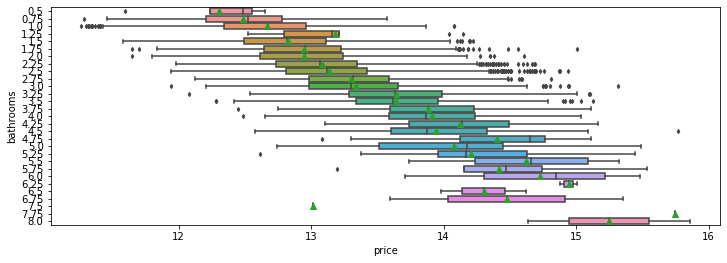

In [25]:
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(y = 'bathrooms', 
            x = 'price', 
            data = housing_df,
            width = 0.8,
            orient = 'h', 
            showmeans = True, 
            fliersize = 3, 
            ax = ax)
plt.show()

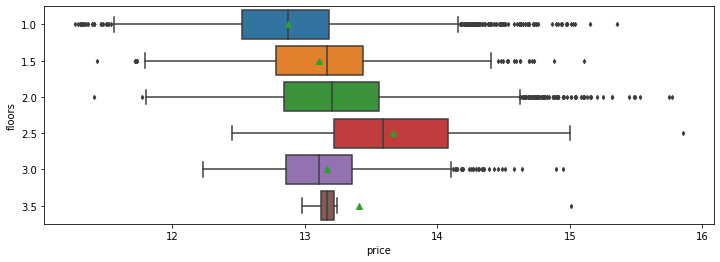

In [26]:
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(y = 'floors', 
            x = 'price', 
            data = housing_df,
            width = 0.8,
            orient = 'h', 
            showmeans = True, 
            fliersize = 3, 
            ax = ax)
plt.show()

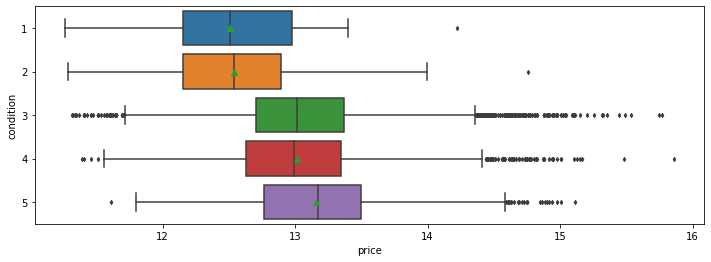

In [27]:
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(y = 'condition', 
            x = 'price', 
            data = housing_df,
            width = 0.8,
            orient = 'h', 
            showmeans = True, 
            fliersize = 3, 
            ax = ax)
plt.show()

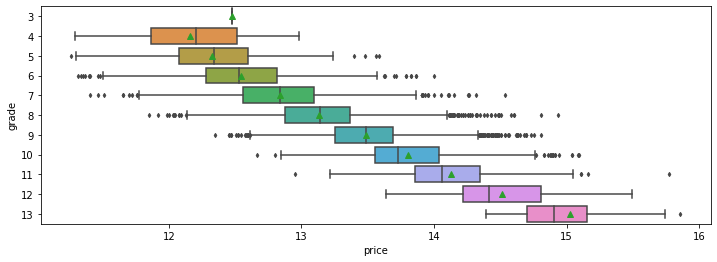

In [28]:
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(y = 'grade', 
            x = 'price', 
            data = housing_df,width = 0.8,
            orient = 'h', 
            showmeans = True, 
            fliersize = 3, 
            ax = ax)
plt.show()

From the figures above, it shows condition has a strong impact with housing price and we will create dummy variables for condition factor to test how much it actually affects with the housing price.

## Creat dummy variables for internal categorical variables

In [29]:
floor_dummies = pd.get_dummies(housing_df['floors'], prefix='floors', drop_first=True)
bathrooms_dummies = pd.get_dummies(housing_df['bathrooms'], prefix='bath', drop_first=True)
condition_dummies = pd.get_dummies(housing_df['condition'], prefix='con', drop_first=True)
grade_dummies = pd.get_dummies(housing_df['grade'], prefix='grade', drop_first=True)

housing_df = housing_df.drop(['floors','bathrooms','condition','grade'], axis=1)

housing_df = pd.concat([housing_df, 
                        floor_dummies, 
                        bathrooms_dummies, 
                        condition_dummies, 
                        grade_dummies
                        ], axis=1)
housing_df.head()

,date,price,bedrooms,sqft_lot,waterfront,view,sqft_above,sqft_basement,yr_built,yr_renovated,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,10/13/2014,12.309982,3,8.639411,0.0,0.0,7.073270,0.0,1955,0.0,...,0,0,0,1,0,0,0,0,0,0
1,12/9/2014,13.195614,3,8.887653,0.0,0.0,7.682482,400.0,1951,1991.0,...,0,0,0,1,0,0,0,0,0,0
2,2/25/2015,12.100712,2,9.210340,0.0,0.0,6.646391,0.0,1933,0.0,...,0,0,1,0,0,0,0,0,0,0
3,12/9/2014,13.311329,4,8.517193,0.0,0.0,6.956545,910.0,1965,0.0,...,0,0,0,1,0,0,0,0,0,0
4,2/18/2015,13.142166,3,8.997147,0.0,0.0,7.426549,0.0,1987,0.0,...,0,0,0,0,1,0,0,0,0,0


In [37]:
housing_df.dtypes

date              object
price            float64
sqft_lot         float64
waterfront       float64
view             float64
sqft_above       float64
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
floors_1.5         uint8
floors_2.0         uint8
floors_2.5         uint8
floors_3.0         uint8
floors_3.5         uint8
bath_0.75          uint8
bath_1.0           uint8
bath_1.25          uint8
bath_1.5           uint8
bath_1.75          uint8
bath_2.0           uint8
bath_2.25          uint8
bath_2.5           uint8
bath_2.75          uint8
bath_3.0           uint8
bath_3.25          uint8
bath_3.5           uint8
bath_3.75          uint8
bath_4.0           uint8
bath_4.25          uint8
bath_4.5           uint8
bath_4.75          uint8
bath_5.0           uint8
bath_5.25          uint8
bath_5.5           uint8
bath_5.75          uint8
bath_6.0           uint8


In [31]:
housing_df.dtypes[:50]

date              object
price            float64
bedrooms           int64
sqft_lot         float64
waterfront       float64
view             float64
sqft_above       float64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
floors_1.5         uint8
floors_2.0         uint8
floors_2.5         uint8
floors_3.0         uint8
floors_3.5         uint8
bath_0.75          uint8
bath_1.0           uint8
bath_1.25          uint8
bath_1.5           uint8
bath_1.75          uint8
bath_2.0           uint8
bath_2.25          uint8
bath_2.5           uint8
bath_2.75          uint8
bath_3.0           uint8
bath_3.25          uint8
bath_3.5           uint8
bath_3.75          uint8
bath_4.0           uint8
bath_4.25          uint8
bath_4.5           uint8
bath_4.75          uint8
bath_5.0           uint8
bath_5.25          uint8
bath_5.5           uint8


In [40]:
housing_df.keys()

Index(['date', 'price', 'sqft_lot', 'waterfront', 'view', 'sqft_above',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'floors_1.5', 'floors_2.0', 'floors_2.5', 'floors_3.0',
       'floors_3.5', 'bath_0.75', 'bath_1.0', 'bath_1.25', 'bath_1.5',
       'bath_1.75', 'bath_2.0', 'bath_2.25', 'bath_2.5', 'bath_2.75',
       'bath_3.0', 'bath_3.25', 'bath_3.5', 'bath_3.75', 'bath_4.0',
       'bath_4.25', 'bath_4.5', 'bath_4.75', 'bath_5.0', 'bath_5.25',
       'bath_5.5', 'bath_5.75', 'bath_6.0', 'bath_6.25', 'bath_6.5',
       'bath_6.75', 'bath_7.5', 'bath_7.75', 'bath_8.0', 'con_2', 'con_3',
       'con_4', 'con_5', 'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8',
       'grade_9', 'grade_10', 'grade_11', 'grade_12', 'grade_13'],
      dtype='object')

## Single Linear Regression

R-Squared: 0.3434109763900405
Intercept     7.705927
sqft_above    0.722404
dtype: float64


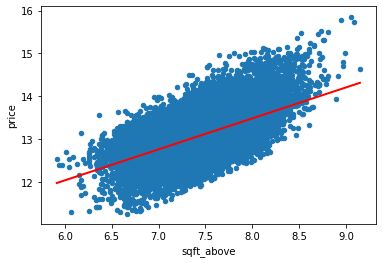

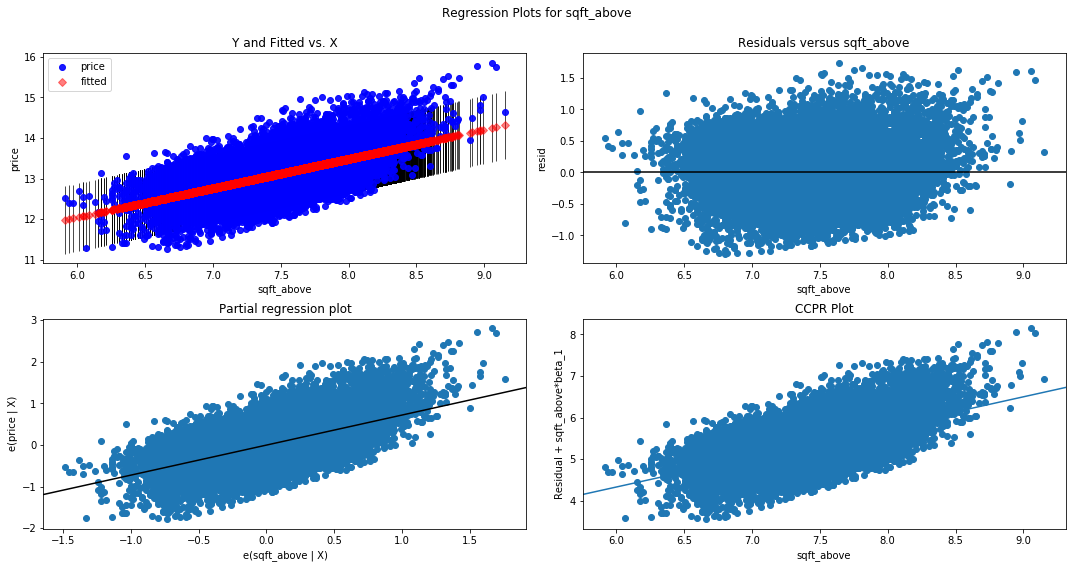

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


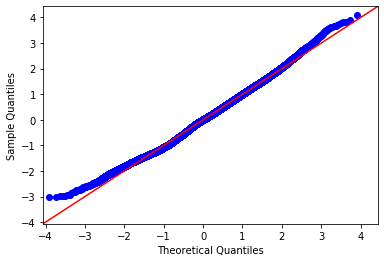

In [57]:
f = 'price~sqft_above'
model = smf.ols(formula=f, data=housing_df).fit()
print ('R-Squared:',model.rsquared)
print (model.params)
X_new = pd.DataFrame({'sqft_above': [housing_df.sqft_above.min(), housing_df.sqft_above.max()]});
preds = model.predict(X_new)
housing_df.plot(kind='scatter', x='sqft_above', y='price');
plt.plot(X_new, preds, c='red', linewidth=2);
plt.show()
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_above", fig=fig)
plt.show()

residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

In [58]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                 1.129e+04
Date:                Tue, 03 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:19:47   Log-Likelihood:                -12249.
No. Observations:               21597   AIC:                         2.450e+04
Df Residuals:                   21595   BIC:                         2.452e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.7059      0.050    153.042      0.000       7.607       7.805
sqft_above     0.7224      0.007    106.276      0.000       0.709       0.736
==============================================================================
Omnibus:                      138.764   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.438
Skew:                           0.188   Prob(JB):                     5.27e-31
Kurtosis:                       2.883   Cond. No.                         131.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-Squared: 0.019116027563072846
Intercept    12.322692
sqft_lot      0.080705
dtype: float64


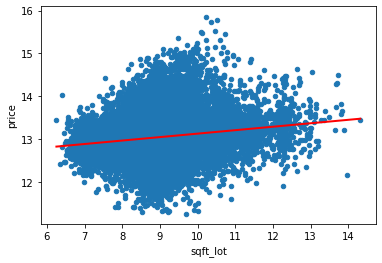

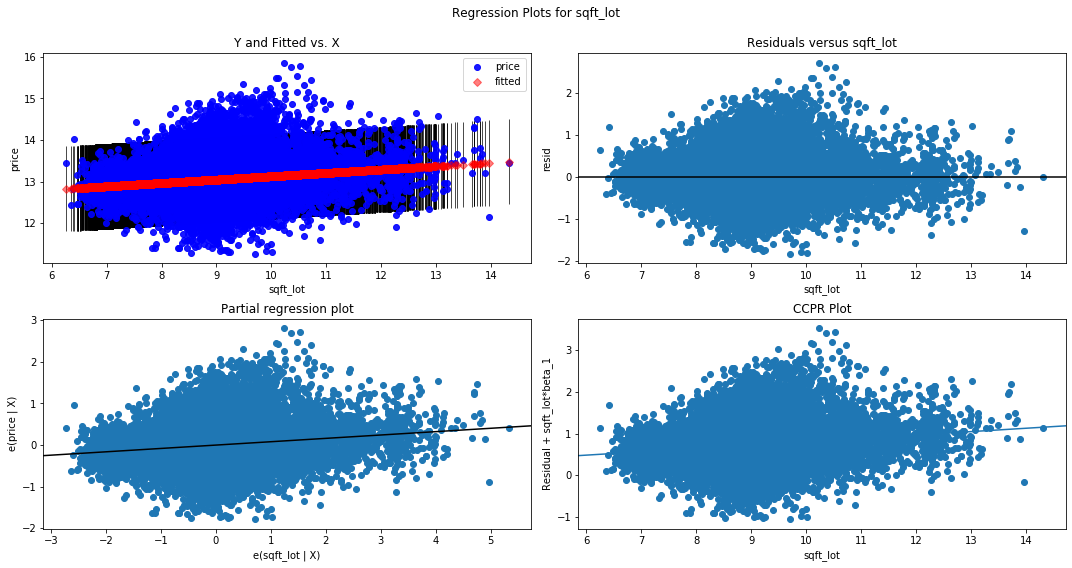

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


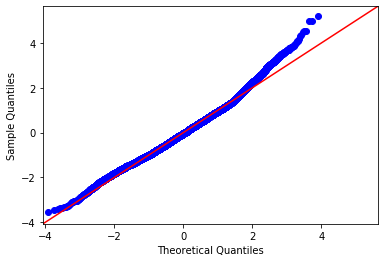

In [59]:
f = 'price~sqft_lot'
model = smf.ols(formula=f, data=housing_df).fit()
print ('R-Squared:',model.rsquared)
print (model.params)
X_new = pd.DataFrame({'sqft_lot': [housing_df.sqft_lot.min(), housing_df.sqft_lot.max()]});
preds = model.predict(X_new)
housing_df.plot(kind='scatter', x='sqft_lot', y='price');
plt.plot(X_new, preds, c='red', linewidth=2);
plt.show()
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_lot", fig=fig)
plt.show()

residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

In [60]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     420.9
Date:                Tue, 03 Dec 2019   Prob (F-statistic):           1.21e-92
Time:                        12:19:58   Log-Likelihood:                -16584.
No. Observations:               21597   AIC:                         3.317e+04
Df Residuals:                   21595   BIC:                         3.319e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3227      0.036    346.695      0.000      12.253      12.392
sqft_lot       0.0807      0.004     20.515      0.000       0.073       0.088
==============================================================================
Omnibus:                      621.977   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              761.236
Skew:                           0.360   Prob(JB):                    5.01e-166
Kurtosis:                       3.572   Cond. No.                         91.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Multi Linear Regression

It seems like sqft_living factor has the strongest impact over housing price, so we will try some different conbinations with sqft_living and other factors

In [41]:
X = housing_df[['sqft_lot','sqft_above',
       'floors_1.5', 'floors_2.0', 'floors_2.5', 'floors_3.0',
       'floors_3.5', 'bath_0.75', 'bath_1.0', 'bath_1.25', 'bath_1.5',
       'bath_1.75', 'bath_2.0', 'bath_2.25', 'bath_2.5', 'bath_2.75',
       'bath_3.0', 'bath_3.25', 'bath_3.5', 'bath_3.75', 'bath_4.0',
       'bath_4.25', 'bath_4.5', 'bath_4.75', 'bath_5.0', 'bath_5.25',
       'bath_5.5', 'bath_5.75', 'bath_6.0', 'bath_6.25', 'bath_6.5',
       'bath_6.75', 'bath_7.5', 'bath_7.75', 'bath_8.0', 'con_2', 'con_3',
       'con_4', 'con_5', 'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8',
       'grade_9', 'grade_10', 'grade_11', 'grade_12', 'grade_13']]
y = housing_df['price']

X = sm.add_constant(X)

model = sm.OLS(y,X).fit()
model.summary()

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     565.1
Date:                Tue, 03 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:06:57   Log-Likelihood:                -7868.1
No. Observations:               21597   AIC:                         1.584e+04
Df Residuals:                   21547   BIC:                         1.624e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.0694      0.403     27.483      0.000      10.280      11.859
sqft_lot      -0.0370      0.003    -11.111      0.000      -0.044      -0.030
sqft_above     0.2065      0.011     18.492      0.000       0.185       0.228
floors_1.5     0.1539      0.009     16.850      0.000       0.136       0.172
floors_2.0    -0.1022      0.008    -12.928      0.000      -0.118      -0.087
floors_2.5     0.0660      0.029      2.296      0.022       0.010       0.122
floors_3.0    -0.0802      0.017     -4.859      0.000      -0.113      -0.048
floors_3.5    -0.0421      0.132     -0.318      0.751      -0.301       0.217
bath_0.75      0.2610      0.180      1.451      0.147      -0.091       0.613
bath_1.0       0.1872      0.175      1.073      0.283      -0.155       0.529
bath_1.25      0.3294      0.210      1.570      0.116      -0.082       0.741
bath_1.5       0.1874      0.175      1.072      0.284      -0.155       0.530
bath_1.75      0.2578      0.175      1.476      0.140      -0.085       0.600
bath_2.0       0.2471      0.175      1.414      0.157      -0.096       0.590
bath_2.25      0.2695      0.175      1.542      0.123      -0.073       0.612
bath_2.5       0.2311      0.175      1.322      0.186      -0.111       0.574
bath_2.75      0.3399      0.175      1.942      0.052      -0.003       0.683
bath_3.0       0.3741      0.175      2.136      0.033       0.031       0.717
bath_3.25      0.4516      0.175      2.576      0.010       0.108       0.795
bath_3.5       0.4319      0.175      2.464      0.014       0.088       0.775
bath_3.75      0.5584      0.177      3.153      0.002       0.211       0.905
bath_4.0       0.5370      0.177      3.026      0.002       0.189       0.885
bath_4.25      0.6324      0.179      3.526      0.000       0.281       0.984
bath_4.5       0.5564      0.178      3.119      0.002       0.207       0.906
bath_4.75      0.7622      0.190      4.017      0.000       0.390       1.134
bath_5.0       0.5916      0.191      3.098      0.002       0.217       0.966
bath_5.25      0.6915      0.200      3.454      0.001       0.299       1.084
bath_5.5       0.7372      0.208      3.536      0.000       0.329       1.146
bath_5.75      0.6489      0.249      2.601      0.009       0.160       1.138
bath_6.0       0.9112      0.228      3.998      0.000       0.464       1.358
bath_6.25      0.9328      0.308      3.033      0.002       0.330       1.536
bath_6.5       0.4566      0.303      1.506      0.132      -0.138       1.051
bath_6.75      0.5853      0.303      1.931      0.054      -0.009       1.180
bath_7.5       0.3315      0.390      0.850      0.396      -0.433       1.097
bath_7.75      1.4163      0.405      3.494      0.000       0.622       2.211
bath_8.0       0.9336      0.309      3.025      0.002       0.329       1.539
co

### Adjust the model

In [53]:
X = housing_df[['sqft_lot', 'sqft_above', 'floors_1.5', 'floors_2.0', 'floors_3.0',
                'bath_1.5', 'bath_1.75', 'bath_2.0', 'bath_2.25', 'bath_2.5', 'bath_2.75',
                'bath_3.0', 'bath_3.25', 'bath_3.5', 'bath_3.75', 'bath_4.0', 'bath_4.25', 
                'bath_4.5', 'bath_4.75', 'bath_5.0', 'bath_5.25', 'bath_5.5', 'bath_6.0',
                'con_2', 'con_4', 'con_5','grade_8', 'grade_9', 'grade_10', 'grade_11', 
                'grade_12', 'grade_13']]
y = housing_df['price']

X = sm.add_constant(X)

model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     806.3
Date:                Tue, 03 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:16:05   Log-Likelihood:                -8294.9
No. Observations:               21597   AIC:                         1.666e+04
Df Residuals:                   21564   BIC:                         1.692e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.0846      0.069    160.084      0.000      10.949      11.220
sqft_lot      -0.0479      0.003    -14.423      0.000      -0.054      -0.041
sqft_above     0.2777      0.011     25.361      0.000       0.256       0.299
floors_1.5     0.1381      0.009     14.930      0.000       0.120       0.156
floors_2.0    -0.1202      0.008    -15.381      0.000      -0.136      -0.105
floors_3.0    -0.0936      0.017     -5.613      0.000      -0.126      -0.061
bath_1.5       0.0670      0.011      6.000      0.000       0.045       0.089
bath_1.75      0.1407      0.009     15.621      0.000       0.123       0.158
bath_2.0       0.1208      0.010     11.697      0.000       0.101       0.141
bath_2.25      0.1587      0.011     14.502      0.000       0.137       0.180
bath_2.5       0.1092      0.010     10.759      0.000       0.089       0.129
bath_2.75      0.2182      0.013     16.452      0.000       0.192       0.244
bath_3.0       0.2519      0.016     16.253      0.000       0.222       0.282
bath_3.25      0.3245      0.018     18.205      0.000       0.290       0.359
bath_3.5       0.3006      0.017     17.759      0.000       0.267       0.334
bath_3.75      0.4208      0.031     13.687      0.000       0.361       0.481
bath_4.0       0.3984      0.033     12.154      0.000       0.334       0.463
bath_4.25      0.4898      0.042     11.610      0.000       0.407       0.573
bath_4.5       0.4138      0.038     10.947      0.000       0.340       0.488
bath_4.75      0.6062      0.076      7.998      0.000       0.458       0.755
bath_5.0       0.4321      0.079      5.469      0.000       0.277       0.587
bath_5.25      0.5394      0.100      5.395      0.000       0.343       0.735
bath_5.5       0.5222      0.116      4.518      0.000       0.296       0.749
bath_6.0       0.7388      0.149      4.949      0.000       0.446       1.031
con_2         -0.1522      0.028     -5.505      0.000      -0.206      -0.098
con_4          0.0874      0.006     14.703      0.000       0.076       0.099
con_5          0.2102      0.009     22.289      0.000       0.192       0.229
grade_8        0.2718      0.007     40.521      0.000       0.259       0.285
grade_9        0.5591      0.010     57.260      0.000       0.540       0.578
grade_10       0.7893      0.014     57.665      0.000       0.762       0.816
grade_11       1.0023      0.021     46.916      0.000       0.960       1.044
grade_12       1.3163      0.041     32.014      0.000       1.236       1.397
grade_13       1.7831      0.102     17.538      0.000       1.584       1.982
==============================================================================
Omnibus:                       17.278   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.271
Sk